In [2]:
cropx = 770     # center x position of the crop square 
cropy = 600     # center y position of the crop square
cropsize = 350  # Half of crop square dimension

crossSec = 346.9e-15 # [m^2]
OD_upper_bound = 4  # valid OD bound value

# IMPORT STATEMENTS
import numpy as np
from PIL import Image, ImageFilter
from pylab import imshow, show, gray
from matplotlib import pyplot
from matplotlib import mlab
from scipy.optimize import curve_fit
from numpy import linspace

directory = './'
MOTfiles = ['mot.jpeg']
probefiles = ['noMot.jpeg']
bgfiles = ['.jpeg']

# SIGMA VALUE FINDING STAGE

def imgavr(filelist): # function to fit to sigma array
    imgarray = np.zeros((2*cropsize, 2*cropsize))
    for filename in filelist:
        filename = directory + filename
        imgsingle = np.array(Image.open(filename).convert('L'))
        imgarray = imgarray + imgsingle[cropy-cropsize:cropy+cropsize,cropx-cropsize:cropx+cropsize]
        del imgsingle
    return imgarray/len(filelist)

px_meter = 13.7e-6 # ratio of px number to meter

MOTimg = imgavr(MOTfiles)
probeimg = imgavr(probefiles)
bgimg = imgavr(bgfiles)
MOTimg = MOTimg - bgimg
probeimg = probeimg - bgimg

MOTimg = np.array([[j if j>0 else 1 for j in i] for i in MOTimg])
probeimg = np.array([[j if j>0 else 1 for j in i] for i in probeimg])
ODarray = -np.log(MOTimg/probeimg)
ODarray = np.array([[j if j<OD_upper_bound else 1 for j in i] for i in ODarray])

Atom Number: 5.436e+07


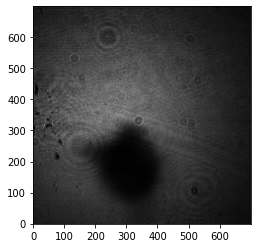

In [6]:
atomNum = (px_meter**2)*np.sum(ODarray)/crossSec
print("Atom Number: {0:.3e}".format(atomNum))

pyplot.imshow(MOTimg, origin='lower', cmap='gray', vmin=0, vmax=255) 
pyplot.show()
#pyplot.savefig('MOT_img.eps',dpi=100)


In [18]:
MOTimg

array([[17., 16., 16., ..., 10., 10., 10.],
       [18., 17., 17., ..., 10., 10., 10.],
       [20., 19., 19., ..., 10., 10., 10.],
       ...,
       [24., 24., 23., ..., 10., 10., 10.],
       [22., 22., 23., ..., 10., 10., 10.],
       [20., 21., 22., ..., 11., 10., 10.]])

In [22]:
mt = MOTimg.tolist()